# Starbucks data analysis for marketing compaign
-data exploration and visualisation

-preprocessing and cleaning

-merging in 1 dataset

1- What are the customers that don't respond to offers i.e never view them?

2- Based on the demographic data of the customers who gets the highest income range , males or females?

3- Who takes longer time to acheive each offer, Males or Females?

4- Which year/month got most clients for starbucks?

5- Which type of promotions(offers) each gender likes?

6- What is the average length between two transcript for the same customer?

7- From all the offers the customers viewed , how many offers they completed?

8- From 10 offer presented, what are the offers that get completed more than others and if we consider customer expense (starbucks revenue)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\Admin\Anaconda3\envs\RoboND\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\Anaconda3\envs\RoboND\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Admin\Anaconda3\envs\RoboND\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [4]:
portfolio.info()
print("data shape: ")
portfolio.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
data shape: 


(10, 6)

In [5]:
#check for nan data
portfolio.isna().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [6]:
# checking for duplicates
print("duplicated :",portfolio.columns.duplicated().sum())
# checking if some id appear twice, how many unique offers?
print("unique offers: ",portfolio['id'].nunique())
#what are the offer types?
print("offer types: ",portfolio['offer_type'].unique())

duplicated : 0
unique offers:  10
offer types:  ['bogo' 'informational' 'discount']


In [7]:
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

### Profile

In [8]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [9]:
profile.info()
print("data shape: ")
profile.shape

# checking for duplicates
print("duplicated ids:",profile['id'].duplicated().sum())
#chcking for nan
print('nan values for income are: ',profile['income'].isna().sum())
print('gender type: ',profile['gender'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB
data shape: 
duplicated ids: 0
nan values for income are:  2175
gender type:  [None 'F' 'M' 'O']


M    57.23
F    41.34
O     1.43
Name: gender, dtype: float64


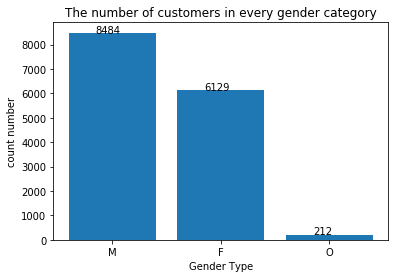

In [10]:
#bar plot for gender,income
a=profile['gender'].value_counts()
plt.bar(['M','F','O'],height=a)
plt.xlabel('Gender Type')
plt.ylabel('count number')
plt.title('The number of customers in every gender category')
xticks, xlabs=plt.xticks()
for i,v in enumerate(a):
    #print(i,' ',v)
    plt.text(i-0.15,v,str(v))
    #print(xticks[i])
#percentage
ratio_data=a/a.sum()
print(round(ratio_data*100,2))

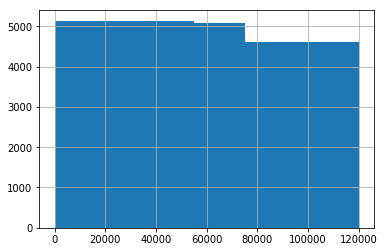

In [11]:

profile.income.hist(bins=[0,55000,75000,120000])

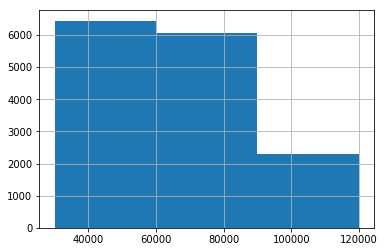

In [12]:
profile.income.hist(bins=3)

In [13]:
profile.income.describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

In [14]:
# one way to determine groups kmeans = KMeans(n_clusters=4, random_state=0).fit(profile.income)
print("income 50.000 :",profile.id[profile['income']==50000].count())
print("income 49.000 :",profile.id[profile['income']<=48000].count())
print("income 50.000 :",profile.id[profile['income']==50000].count())

income 50.000 : 253
income 49.000 : 3624
income 50.000 : 253


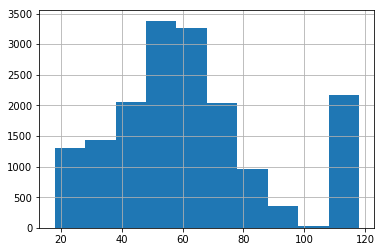

In [15]:
profile.age.hist()

In [16]:
df_outliers=profile[profile['age']==118]

print('missing gender: ',df_outliers.gender.isna().sum())
print('missing income: ',df_outliers.income.isna().sum())

missing gender:  2175
missing income:  2175


In [17]:
df_outliers.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN


### FIRST CONCLUSION

In [18]:
profile_processed=profile[profile['age']!=118]
profile_processed.head()

,age,became_member_on,gender,id,income
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


### TRANSCRIPT DATASET

In [19]:
transcript.head()


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [20]:
transcript.info()
print("shape: ",transcript.shape)
print('missing values',transcript.columns.isna().sum())
print('time range',transcript.time.unique())
print('event type',transcript.event.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
shape:  (306534, 4)
missing values 0
time range [  0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102
 108 114 120 126 132 138 144 150 156 162 168 174 180 186 192 198 204 210
 216 222 228 234 240 246 252 258 264 270 276 282 288 294 300 306 312 318
 324 330 336 342 348 354 360 366 372 378 384 390 396 402 408 414 420 426
 432 438 444 450 456 462 468 474 480 486 492 498 504 510 516 522 528 534
 540 546 552 558 564 570 576 582 588 594 600 606 612 618 624 630 636 642
 648 654 660 666 672 678 684 690 696 702 708 714]
event type ['offer received' 'offer viewed' 'transaction' 'offer completed']


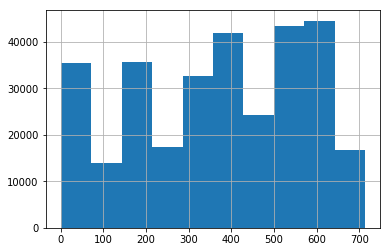

In [21]:
transcript.time.hist()

In [22]:
transcript.value.duplicated().sum()

301413

In [23]:
transcript[transcript.person=='78afa995795e4d85b5d9ceeca43f5fef']

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
15561,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
47582,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,{'amount': 19.89}
47583,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
49502,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,{'amount': 17.78}
53176,offer received,78afa995795e4d85b5d9ceeca43f5fef,168,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
85291,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,216,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
87134,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,{'amount': 19.67}
92104,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,{'amount': 29.72}
141566,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,{'amount': 23.93}


In [24]:
#bogo
portfolio[portfolio.id=='ae264e3637204a6fb9bb56bc8210ddfd']#offer completed

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10


In [25]:
#informational
portfolio[portfolio.id=='5a8bc65990b245e5a138643cd4eb9837']#offer not completed

,channels,difficulty,duration,id,offer_type,reward
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0


transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64


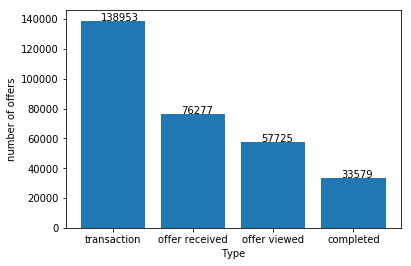

In [26]:
# transcript[transcript.value[262137].get('offer id')=='f19421c1d4aa40978ebb69ca19b0e20d']#0b1e1539f2cc45b7b9fa7c272da2e1d7
# type(transcript.value[0])
offers=transcript.event.value_counts()
print(offers)
plt.bar(['transaction','offer received','offer viewed','completed'],height=offers)
plt.xlabel('Type')
plt.ylabel('number of offers')
for k,v in enumerate(offers):
#     print(k)
    plt.text(k-0.15,v,str(v))

### QUESTIONS?
1) Does females or Males respond better to offers i.e view&complete

2) what are the ids of people that receive the offers but never view them

3) Are there some people that always complete the offers? In this case, do they do because they have a habit of spending?

In [27]:
portfolio_processed=portfolio.copy()
portfolio_processed.rename(columns={'id':'offer_id'},inplace=True)
#portfolio_processed.duration=portfolio_processed.duration*24

scaler=MinMaxScaler()#default =0.1
transform=['duration','difficulty','reward']
portfolio_processed[transform]=scaler.fit_transform(portfolio_processed[transform])

C:\Users\Admin\Anaconda3\envs\RoboND\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
portfolio_processed.head()

,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",0.50,0.571429,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1.0
1,"[web, email, mobile, social]",0.50,0.285714,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1.0
2,"[web, email, mobile]",0.00,0.142857,3f207df678b143eea3cee63160fa8bed,informational,0.0
3,"[web, email, mobile]",0.25,0.571429,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,0.5
4,"[web, email]",1.00,1.000000,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0.5


In [29]:
portfolio_processed['email']=portfolio_processed.channels.apply(lambda x: 1 if 'email' in x else 0)
portfolio_processed['mobile']=portfolio_processed.channels.apply(lambda x: 1 if 'mobile' in x else 0)
portfolio_processed['social']=portfolio_processed.channels.apply(lambda x: 1 if 'social' in x else 0)
portfolio_processed['web']=portfolio_processed.channels.apply(lambda x: 1 if 'web' in x else 0)
portfolio_processed.drop('channels',axis=1,inplace=True)
portfolio_processed.head()

,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web
0,0.50,0.571429,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1.0,1,1,1,0
1,0.50,0.285714,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1.0,1,1,1,1
2,0.00,0.142857,3f207df678b143eea3cee63160fa8bed,informational,0.0,1,1,0,1
3,0.25,0.571429,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,0.5,1,1,0,1
4,1.00,1.000000,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0.5,1,0,0,1


In [30]:
# generate mapping for offer_id and replace
labels_offer=portfolio_processed['offer_id'].astype('category').cat.categories.tolist()
print(labels_offer)
mapping_labels_offer={'offer_id':{a:b for a,b in zip(labels_offer,list(range(1,len(labels_offer)+1)))}}
print(mapping_labels_offer)
portfolio_processed.replace(mapping_labels_offer,inplace=True)
portfolio_processed.head()

['0b1e1539f2cc45b7b9fa7c272da2e1d7', '2298d6c36e964ae4a3e7e9706d1fb8c2', '2906b810c7d4411798c6938adc9daaa5', '3f207df678b143eea3cee63160fa8bed', '4d5c57ea9a6940dd891ad53e9dbe8da0', '5a8bc65990b245e5a138643cd4eb9837', '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'ae264e3637204a6fb9bb56bc8210ddfd', 'f19421c1d4aa40978ebb69ca19b0e20d', 'fafdcd668e3743c1bb461111dcafc2a4']
{'offer_id': {'2298d6c36e964ae4a3e7e9706d1fb8c2': 2, '9b98b8c7a33c4b65b9aebfe6a799e6d9': 7, '3f207df678b143eea3cee63160fa8bed': 4, 'f19421c1d4aa40978ebb69ca19b0e20d': 9, 'ae264e3637204a6fb9bb56bc8210ddfd': 8, '4d5c57ea9a6940dd891ad53e9dbe8da0': 5, '2906b810c7d4411798c6938adc9daaa5': 3, '0b1e1539f2cc45b7b9fa7c272da2e1d7': 1, 'fafdcd668e3743c1bb461111dcafc2a4': 10, '5a8bc65990b245e5a138643cd4eb9837': 6}}


,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web
0,0.50,0.571429,8,bogo,1.0,1,1,1,0
1,0.50,0.285714,5,bogo,1.0,1,1,1,1
2,0.00,0.142857,4,informational,0.0,1,1,0,1
3,0.25,0.571429,7,bogo,0.5,1,1,0,1
4,1.00,1.000000,1,discount,0.5,1,0,0,1


In [31]:
# generate mapping for offer_type and replace
mapping_offer_type={'bogo' : '1','informational':'2','discount':'3'}
portfolio_processed.replace(mapping_offer_type,inplace=True)
portfolio_processed.head()

,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web
0,0.50,0.571429,8,1,1.0,1,1,1,0
1,0.50,0.285714,5,1,1.0,1,1,1,1
2,0.00,0.142857,4,2,0.0,1,1,0,1
3,0.25,0.571429,7,1,0.5,1,1,0,1
4,1.00,1.000000,1,3,0.5,1,0,0,1


# Profile preprocessing

In [32]:
profile_processed=profile.copy()
profile_processed.rename(columns={'id':'person_id'},inplace=True)
profile_processed.dropna(inplace=True)

In [33]:
#type(profile_processed['age'])
#profile_processed['income'].apply(type)
profile_processed[['age','income']]=profile_processed[['age','income']].astype(int)
#generate mapping for scaling age
scaler=MinMaxScaler()#default =0.1
transform=['age','income']
profile_processed[transform]=scaler.fit_transform(profile_processed[transform])
profile_processed.head()

C:\Users\Admin\Anaconda3\envs\RoboND\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,became_member_on,gender,person_id,income
1,0.445783,20170715,F,0610b486422d4921ae7d2bf64640c50b,0.911111
3,0.686747,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,0.777778
5,0.602410,20180426,M,e2127556f4f64592b11af22de27a7932,0.444444
8,0.566265,20180209,M,389bc3fa690240e798340f5a15918d5c,0.255556
12,0.481928,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,0.233333


In [34]:

#mapping for person_id
prId=sorted(list(profile_processed['person_id']))
mapPersonId={k:v for k,v in zip(prId,list(range(1,len(prId)+1)))}
profile_processed['person_id'].replace(mapPersonId,inplace=True)


In [35]:
profile_processed['gender'].replace({'F':1,'M':2,'O':3},inplace=True)
profile_processed.head()

,age,became_member_on,gender,person_id,income
1,0.445783,20170715,1,347,0.911111
3,0.686747,20170509,1,6963,0.777778
5,0.602410,20180426,2,13108,0.444444
8,0.566265,20180209,2,3247,0.255556
12,0.481928,20171111,2,2670,0.233333


# strategy for preprocessing
became_member on will be transformed to how many days the client is a member and will be normalized with minMaxScaler

In [36]:
profile_processed['became_member_on'] = pd.to_datetime(profile_processed['became_member_on'], format = '%Y%m%d')
profile_processed['membership_days']= datetime.datetime.today().date() - profile_processed['became_member_on'].dt.date
scaler=MinMaxScaler()#default =0.1
transform=['membership_days']
profile_processed[transform]=scaler.fit_transform(profile_processed[transform])
profile_processed.head()


C:\Users\Admin\Anaconda3\envs\RoboND\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype timedelta64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,became_member_on,gender,person_id,income,membership_days
1,0.445783,2017-07-15,1,347,0.911111,0.206253
3,0.686747,2017-05-09,1,6963,0.777778,0.243006
5,0.602410,2018-04-26,2,13108,0.444444,0.049918
8,0.566265,2018-02-09,2,3247,0.255556,0.091607
12,0.481928,2017-11-11,2,2670,0.233333,0.140976


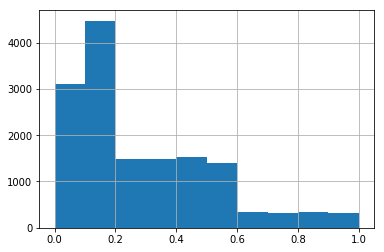

In [37]:
profile_processed.membership_days.hist()

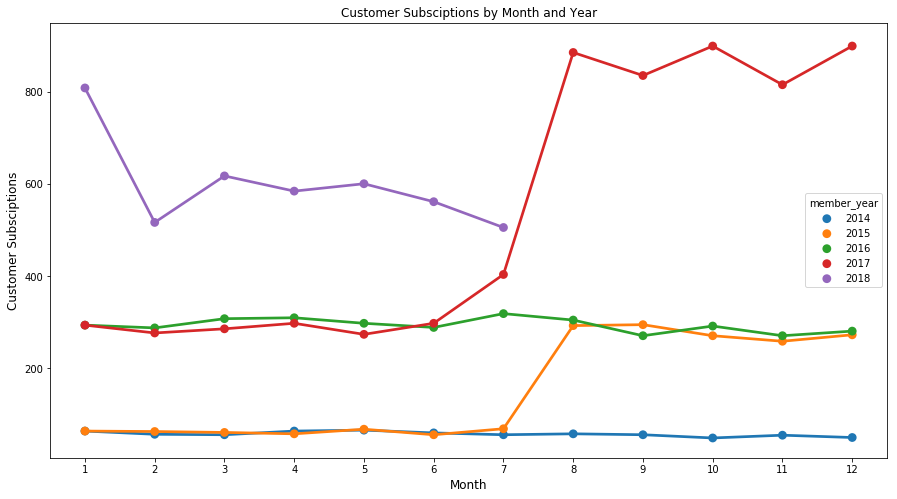

In [38]:
profile['member_year'] = profile.became_member_on.apply(lambda x: int(str(x)[:4]))
profile['member_month'] = profile.became_member_on.apply(lambda x: int(str(x)[4:6]))
membership_subs = profile[profile['member_year'] >= 2014].groupby(['member_year','member_month'], as_index=False).agg({'id':'count'})
plt.figure(figsize=(15,8))
sns.pointplot(x="member_month", y="id", hue="member_year", data = membership_subs)
plt.ylabel('Customer Subsciptions', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.title('Customer Subsciptions by Month and Year');

# preprocessing transcript
strategy:
1) normalising 

In [39]:
transcript_processed=transcript.copy()
transcript_processed.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [40]:
transcript_processed.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [41]:
transcript_processed.value.describe()

count                                               306534
unique                                                5121
top       {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
freq                                                 14983
Name: value, dtype: object

In [42]:
keys=[]
values=[]
for idx,row in transcript_processed.iterrows():
    for key,value in row['value'].items():
        if key not in keys:
            keys.append(key)
        if value not in values and len(str(value))==32:
            values.append(value)

In [43]:
keys

['offer id', 'amount', 'offer_id', 'reward']

In [44]:
values

['9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2906b810c7d4411798c6938adc9daaa5',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '3f207df678b143eea3cee63160fa8bed',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '5a8bc65990b245e5a138643cd4eb9837']

-leaving only offer viewed and completed and deleting all coresponding rows: offer ids

-since we are interested in view and completed offers

In [45]:
# for idx,row in transcript_processed.iterrows():
#     for value in row['event']:
#         if value=='transaction' or value=='offer received':
#             transcript_processed.event[idx]= NaN
transcript_processed['event'].replace({'offer received':np.NaN, 'transaction':np.NaN, '':np.NaN},inplace=True)

In [46]:
transcript_processed.head()

,event,person,time,value
0,NaN,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,NaN,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,NaN,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,NaN,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,NaN,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [47]:
print('number of nan element in event: ',transcript_processed.event.isnull().sum())
print('shape before dropping: ',transcript_processed.shape)
transcript_processed.dropna(how='any',axis=0,inplace=True)

transcript_processed.head()

number of nan element in event:  215230
shape before dropping:  (306534, 4)


,event,person,time,value
12650,offer viewed,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
12651,offer viewed,d1ede868e29245ea91818a903fec04c6,0,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
12652,offer viewed,102e9454054946fda62242d2e176fdce,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
12653,offer viewed,02c083884c7d45b39cc68e1314fec56c,0,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
12655,offer viewed,be8a5d1981a2458d90b255ddc7e0d174,0,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}


In [48]:
print('after eliminating:',transcript_processed.shape)

after eliminating: (91304, 4)


In [49]:
# the normal form is {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}, for some reason in some cases only id is present so we keep it

    for ids,row in transcript_processed.iterrows():
        try:
            if 'offer_id' in row['value'].keys():
                transcript_processed.at[ids,'offer_id']=row['value']['offer_id']
            else:
                transcript_processed.at[ids,'offer_id']=row['value']['offer id']
        except:
            print(row['value'])
            print(ids)

In [50]:
transcript_processed.iloc[0,3]

{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}

In [51]:
# transcript_processed.replace(mapPersonId,inplace=True)
# print(profile_processed.dtypes)
transcript_processed.rename(columns={'person':'person_id'},inplace=True)
transcript_processed.replace(mapPersonId,inplace=True)

In [52]:
transcript_processed.drop(['value'],axis=1,inplace=True)#dropping initial column
transcript_processed.head()

,event,person_id,time,offer_id
12650,offer viewed,3247,0,f19421c1d4aa40978ebb69ca19b0e20d
12651,offer viewed,12182,0,5a8bc65990b245e5a138643cd4eb9837
12652,offer viewed,922,0,4d5c57ea9a6940dd891ad53e9dbe8da0
12653,offer viewed,149,0,ae264e3637204a6fb9bb56bc8210ddfd
12655,offer viewed,11108,0,5a8bc65990b245e5a138643cd4eb9837


In [53]:
transcript_processed.rename(columns={'client_id':'offer_id'},inplace=True)


In [54]:
labels_event = transcript_processed['event'].astype('category').cat.categories.tolist()
replace_map_comp_event = {'event' : {k: v for k,v in zip(labels_event,list(range(1,len(labels_event)+1)))}}
transcript_processed.replace(replace_map_comp_event, inplace=True)
transcript_processed.replace(mapping_labels_offer, inplace=True)
transcript_processed.head()

,event,person_id,time,offer_id
12650,2,3247,0,9
12651,2,12182,0,6
12652,2,922,0,5
12653,2,149,0,8
12655,2,11108,0,6


In [55]:
transcript_processed.event.unique()

array([2, 1], dtype=int64)

# remark
in order to obtain viewed and completed we need to erase all the raws in dataframe that has the same analog in terms of person_id and offer_id, but are completed.

In [56]:
transcript_processed[(transcript_processed.person_id==3247) & (transcript_processed.offer_id==9)]

,event,person_id,time,offer_id
12650,2,3247,0,9
32626,1,3247,60,9
214275,2,3247,504,9
271781,1,3247,600,9


In [57]:
#basic logic that we iterate from bottom up and if we see 2 in an event we remove it and replace the first '1' with 2 that we see and we restart
transcript_processed.shape

(91304, 4)

In [58]:
# 1 -remove all the outliers that we removed during processing profile with age 118
# ids=transcript_processed[len(transcript_processed.person_id)>7].index
for ids,row in transcript_processed.iterrows():
      if len(str(row.person_id))>7:
        transcript_processed.drop(ids,axis=0,inplace=True)

            

In [59]:
transcript_processed=transcript_processed.reset_index()

In [61]:
transcript_processed.head()

,index,event,person_id,time,offer_id
0,12650,2,3247,0,9
1,12651,2,12182,0,6
2,12652,2,922,0,5
3,12653,2,149,0,8
4,12655,2,11108,0,6


In [70]:
# 1st question response
viewed=transcript_processed.person_id.nunique()
abs_person=profile.id.nunique()-viewed
print('persons that don\'t open the offer',abs_person)

persons that don't open the offer 2255


In [72]:
tr=transcript[transcript.event=='transaction']
tr.head()

,event,person,time,value
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,{'amount': 0.8300000000000001}
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'amount': 34.56}
12659,transaction,54890f68699049c2a04d415abc25e717,0,{'amount': 13.23}
12670,transaction,b2f1cd155b864803ad8334cdf13c4bd2,0,{'amount': 19.51}
12671,transaction,fe97aa22dd3e48c8b143116a8403dd52,0,{'amount': 18.97}


In [120]:

# keys,values=zip(*tr.value.items())
# #value column unzip
# transactions=values.values()
# transaction_list=[]
# trans=list(x for x in values)
# transaction_list=[float(x.values()) for x in trans]
listT=[]
for ids,row in tr.iterrows():
        try:
            listT.append(float(row['value']['amount']))
        except:
            pass

In [122]:
print(np.mean(listT))
print(np.min(listT))
print(np.max(listT))

12.777356156398204
0.05
1062.28


In [132]:
transcript_processed.person_id=transcript_processed.person_id.astype(int)

In [134]:
masterT=transcript_processed.merge(portfolio_processed,how='left',on='offer_id')
master=masterT.merge(profile_processed,how='left',on='person_id')

In [135]:
masterT.head()

,index,event,person_id,time,offer_id,difficulty,duration,offer_type,reward,email,mobile,social,web
0,12650,2,3247,0,9,0.25,0.285714,1,0.5,1,1,1,1
1,12651,2,12182,0,6,0.00,0.000000,2,0.0,1,1,1,0
2,12652,2,922,0,5,0.50,0.285714,1,1.0,1,1,1,1
3,12653,2,149,0,8,0.50,0.571429,1,1.0,1,1,1,0
4,12655,2,11108,0,6,0.00,0.000000,2,0.0,1,1,1,0


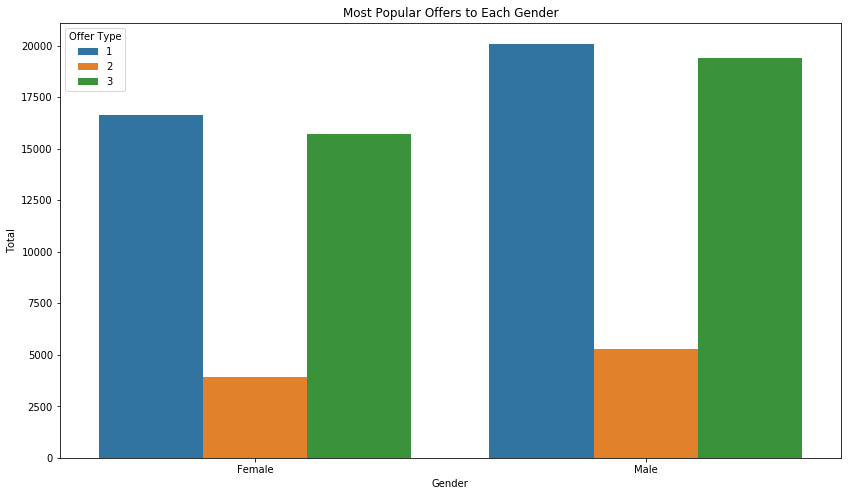

In [138]:

plt.figure(figsize=(14, 8))
g = sns.countplot(x='gender', hue="offer_type", data= master[master["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();